In [82]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [108]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [109]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [112]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [39]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [40]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1944cbc39c918c9e22ecb704ec36295c


In [41]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kananga
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | iberia
Processing Record 5 of Set 1 | asau
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | kokopo
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | imeni poliny osipenko
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | shorapur
Processing Record 17 of Set 1 | hualmay
Processing Record 18 of Set 1 | narrabri
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | bluff
Processing Re

Processing Record 39 of Set 4 | tazovskiy
Processing Record 40 of Set 4 | dakar
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | abu samrah
Processing Record 44 of Set 4 | labuhan
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | country club
Processing Record 47 of Set 4 | mogadishu
Processing Record 48 of Set 4 | karakendzha
City not found. Skipping...
Processing Record 49 of Set 4 | rolim de moura
City not found. Skipping...
Processing Record 50 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 5 | nyurba
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | dawlatabad
Processing Record 4 of Set 5 | antalaha
Processing Record 5 of Set 5 | sabha
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | campo gobierno
Processing Record 8 of Set 5 | coihaique
Processing Record 9 of Set 5 | tevaitoa
Processing Record 10 of Set 5 | lahaina
Process

Processing Record 32 of Set 8 | da lat
Processing Record 33 of Set 8 | berlevag
Processing Record 34 of Set 8 | taphan hin
Processing Record 35 of Set 8 | solsvik
City not found. Skipping...
Processing Record 36 of Set 8 | mezen
Processing Record 37 of Set 8 | olafsvik
Processing Record 38 of Set 8 | buraydah
Processing Record 39 of Set 8 | matamoros
Processing Record 40 of Set 8 | tanout
Processing Record 41 of Set 8 | petersburg
Processing Record 42 of Set 8 | carnarvon
Processing Record 43 of Set 8 | plettenberg bay
Processing Record 44 of Set 8 | bilma
Processing Record 45 of Set 8 | tateyama
Processing Record 46 of Set 8 | atbasar
Processing Record 47 of Set 8 | bontang
Processing Record 48 of Set 8 | souillac
Processing Record 49 of Set 8 | west helena
Processing Record 50 of Set 8 | marsh harbour
Processing Record 1 of Set 9 | honningsvag
Processing Record 2 of Set 9 | jacqueville
Processing Record 3 of Set 9 | bardiyah
Processing Record 4 of Set 9 | ossora
Processing Record 5 o

Processing Record 22 of Set 12 | ijaki
City not found. Skipping...
Processing Record 23 of Set 12 | arang
Processing Record 24 of Set 12 | humaita
Processing Record 25 of Set 12 | mponela
Processing Record 26 of Set 12 | nome
Processing Record 27 of Set 12 | gornyye klyuchi
Processing Record 28 of Set 12 | kabelvag
Processing Record 29 of Set 12 | coxim
Processing Record 30 of Set 12 | nguiu
City not found. Skipping...
Processing Record 31 of Set 12 | taoudenni
Processing Record 32 of Set 12 | kathmandu
Processing Record 33 of Set 12 | sao gabriel da cachoeira
Processing Record 34 of Set 12 | grand-santi
Processing Record 35 of Set 12 | praia da vitoria
Processing Record 36 of Set 12 | shimoda
Processing Record 37 of Set 12 | yusva
City not found. Skipping...
Processing Record 38 of Set 12 | paamiut
Processing Record 39 of Set 12 | tandil
Processing Record 40 of Set 12 | huilong
Processing Record 41 of Set 12 | bullhead city
Processing Record 42 of Set 12 | makakilo city
Processing Rec

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kananga,-5.8958,22.4178,68.32,95,100,0.87,CD,2021-01-13 23:38:31
1,Cape Town,-33.9258,18.4232,72.00,73,0,12.66,ZA,2021-01-13 23:38:19
2,Mataura,-46.1927,168.8643,77.09,44,0,2.46,NZ,2021-01-13 23:38:31
3,Iberia,29.9502,-91.7507,55.00,62,1,10.36,US,2021-01-13 23:38:31
4,Asau,46.4333,26.4000,28.40,100,42,2.30,RO,2021-01-13 23:34:49
5,Punta Arenas,-53.1500,-70.9167,53.60,76,90,17.27,CL,2021-01-13 23:38:31
6,Ushuaia,-54.8000,-68.3000,57.20,54,75,4.85,AR,2021-01-13 23:36:21
7,Saskylakh,71.9167,114.0833,-44.52,76,94,10.54,RU,2021-01-13 23:34:51
8,Kokopo,-4.3520,152.2633,84.60,64,93,2.53,PG,2021-01-13 23:38:31
9,Provideniya,64.3833,-173.3000,5.00,72,90,8.95,RU,2021-01-13 23:38:32


In [43]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]
df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kananga,CD,2021-01-13 23:38:31,-5.8958,22.4178,68.32,95,100,0.87
1,Cape Town,ZA,2021-01-13 23:38:19,-33.9258,18.4232,72.00,73,0,12.66
2,Mataura,NZ,2021-01-13 23:38:31,-46.1927,168.8643,77.09,44,0,2.46
3,Iberia,US,2021-01-13 23:38:31,29.9502,-91.7507,55.00,62,1,10.36
4,Asau,RO,2021-01-13 23:34:49,46.4333,26.4000,28.40,100,42,2.30
5,Punta Arenas,CL,2021-01-13 23:38:31,-53.1500,-70.9167,53.60,76,90,17.27
6,Ushuaia,AR,2021-01-13 23:36:21,-54.8000,-68.3000,57.20,54,75,4.85
7,Saskylakh,RU,2021-01-13 23:34:51,71.9167,114.0833,-44.52,76,94,10.54
8,Kokopo,PG,2021-01-13 23:38:31,-4.3520,152.2633,84.60,64,93,2.53
9,Provideniya,RU,2021-01-13 23:38:32,64.3833,-173.3000,5.00,72,90,8.95


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

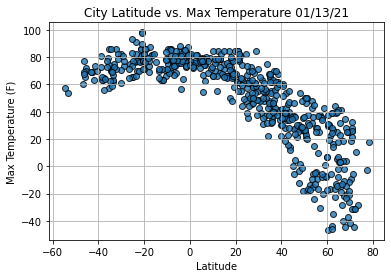

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

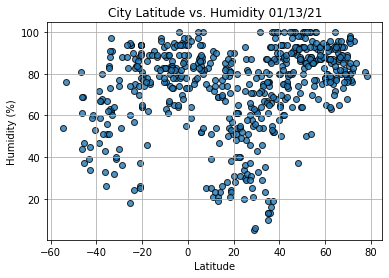

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

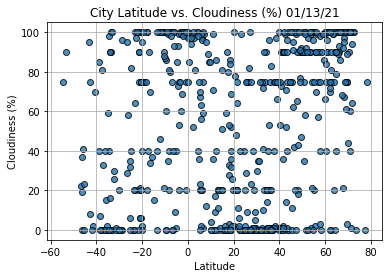

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

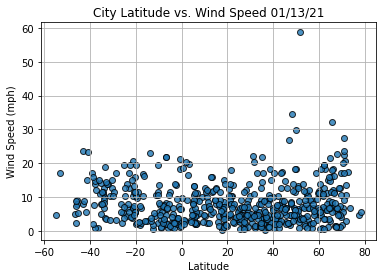

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


<function plot_linear_regression at 0x000002336713DB88>


In [32]:
index13 = city_data_df.loc[13]
index13

City                       Hobart
Lat                      -42.8794
Lng                       147.329
Max Temp                    69.01
Humidity                       45
Cloudiness                     75
Wind Speed                   8.05
Country                        AU
Date          2021-01-13 23:37:23
Name: 13, dtype: object

In [54]:
# Get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, from the city_data_df.
city_data_df["Lat"]>= 0

0      False
1      False
2      False
3       True
4       True
       ...  
565     True
566     True
567     True
568    False
569     True
Name: Lat, Length: 570, dtype: bool

In [56]:
# Get a dataframe all latitudes greater than or equal to 0.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Iberia,29.9502,-91.7507,55.00,62,1,10.36,US,2021-01-13 23:38:31
4,Asau,46.4333,26.4000,28.40,100,42,2.30,RO,2021-01-13 23:34:49
7,Saskylakh,71.9167,114.0833,-44.52,76,94,10.54,RU,2021-01-13 23:34:51
9,Provideniya,64.3833,-173.3000,5.00,72,90,8.95,RU,2021-01-13 23:38:32
10,Imeni Poliny Osipenko,52.4201,136.4853,-13.47,88,97,7.02,RU,2021-01-13 23:38:32


In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

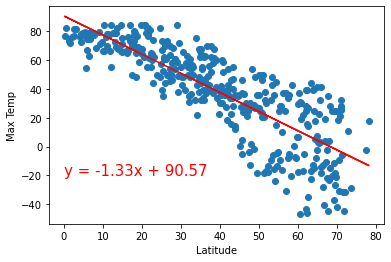

In [63]:
# Linear regression on the Northern Hemisphere for Maximum Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))

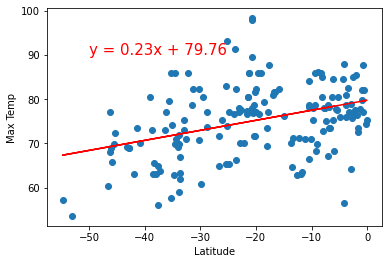

In [64]:
# Linear regression on the Southern Hemisphere for Maximum Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

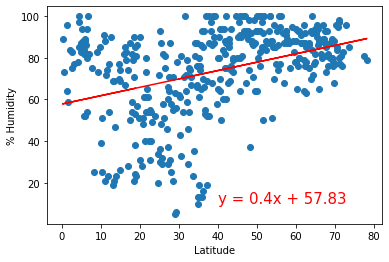

In [65]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

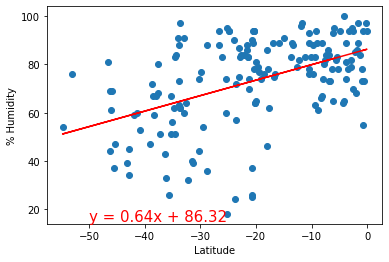

In [69]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

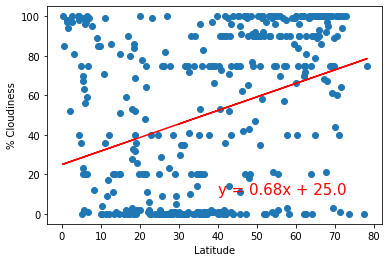

In [70]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

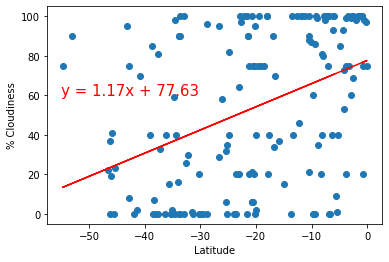

In [75]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-55,60))

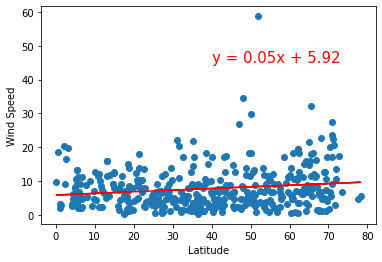

In [78]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,45))

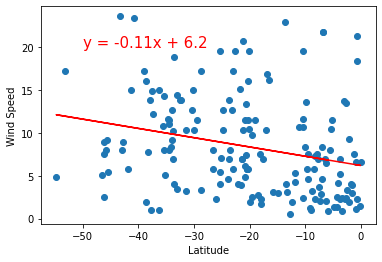

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))